# Limpieza de Datos: Ataque de tiburones

> Bloque con sangría

> Bloque con sangría

> Bloque con sangría







![](https://editor.analyticsvidhya.com/uploads/443081_Xhm9c9qDfXa3ZCQjiOvm_w.jpeg)

![](https://datascientest.com/wp-content/uploads/2021/05/illu_data_cleaning_blog_2-07.png)

La misión del Global Shark Attack File es proporcionar datos actuales e históricos sobre las interacciones entre humanos y tiburones para aquellos que buscan información precisa, significativa y referencias verificables. 

Los humanos no están en el menú de los tiburones. Los tiburones muerden a los humanos por curiosidad o para defenderse.


- Se define un **incidente provocado** como uno en el que el tiburón fue atravesado, enganchado, capturado o en el que un ser humano extrajo "primera sangre". Sabemos que un ser humano vivo rara vez es percibido como presa por un tiburón. Muchos incidentes están motivados por la curiosidad, otros pueden ocurrir cuando un tiburón percibe a un humano como una amenaza o un competidor por una fuente de alimento, y podrían clasificarse como "provocados" cuando se examinan desde la perspectiva del tiburón. 

- **Incidentes que involucran embarcaciones**: los incidentes en los que un barco fue mordido o embestido por un tiburón están en verde. Sin embargo, en los casos en los que el tiburón fue enganchado, enredado o amarrado, la entrada es naranja porque se clasifican como incidentes provocados. 

- **Incidentes cuestionables**: incidentes en los que no hay datos suficientes para determinar si la lesión fue causada por un tiburón o si la persona se ahogó y el cuerpo fue luego devorado por los tiburones

Fuente: https://sharkattackfile.net/

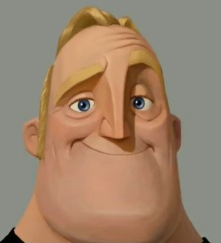

**texto en negrita**# Nueva sección

# 1 CARGAR ARCHIVOS Y LIMPIARLOS 


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np


In [3]:
ruta_archivo = '/content/drive/MyDrive/sistema/csv_grow/hasta_15_A.csv'
df = pd.read_csv(ruta_archivo)





visualizamos el dataframe y hacemos un analisis general 

In [4]:

pd.options.display.max_columns = 38


In [ ]:
df

,id,idturno,idusuario,idcliente,fecha,hora,tipo,total,tipo_comprobante,numero_comprobante,numero_cae,vto_cae,codigo_barra,cuit_cliente,condicion_iva,razon_social,domicio_comercial,localidad,provincia,detalle_comprobante,estado,neto21,iva21,neto105,iva105,id.1,idegreso,codigo,descripcion,cantidad,precio,subtotal,costo,idrubro,porcentaje_iva,precio_siva,importe_iva,subtotal_siva
0,94733,1731,34,107,2023-04-17 00:00:00.000,1899-12-30 19:00:38.000,Cta. Cte.,792.0,*,*,*,*,*,*,*,*,*,*,*,*,Ppto.,0.0,0.0,0.0,0.0,213433,94733,5411786063519,Tabaco Flandria Silver,1.0,792.0,792.0,0.0,174,0.0,0.0,0.0,0.0
1,94730,1731,34,4,2023-04-17 00:00:00.000,1899-12-30 18:32:59.000,Contado,4410.0,*,*,*,*,*,*,*,*,*,*,*,*,Ppto.,0.0,0.0,0.0,0.0,213428,94730,009,NAMASTE TRICO + 100g,1.0,810.0,810.0,427.0,213,0.0,0.0,0.0,0.0
2,94730,1731,34,4,2023-04-17 00:00:00.000,1899-12-30 18:32:59.000,Contado,4410.0,*,*,*,*,*,*,*,*,*,*,*,*,Ppto.,0.0,0.0,0.0,0.0,213429,94730,8414606516469,TOP CROP TOP BUD 100ml,1.0,3600.0,3600.0,0.0,213,0.0,0.0,0.0,0.0
3,94732,1731,34,4,2023-04-17 00:00:00.000,1899-12-30 18:58:47.000,Contado,315.0,*,*,*,*,*,*,*,*,*,*,*,*,Ppto.,0.0,0.0,0.0,0.0,213432,94732,P1,REPUESTO REJILLA PIPA X5,1.0,135.0,135.0,0.0,215,0.0,0.0,0.0,0.0
4,94732,1731,34,4,2023-04-17 00:00:00.000,1899-12-30 18:58:47.000,Contado,315.0,*,*,*,*,*,*,*,*,*,*,*,*,Ppto.,0.0,0.0,0.0,0.0,213431,94732,bluntrey,filtro troquelado,1.0,180.0,180.0,0.0,214,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,94226,1553,35,4,2022-09-19 00:00:00.000,1899-12-30 18:21:18.000,Contado,180.0,*,*,*,*,*,*,*,*,*,*,*,*,Ppto.,0.0,0.0,0.0,0.0,212267,94226,1,filtros de plasticos,1.0,45.0,45.0,0.0,174,0.0,0.0,0.0,0.0
1166,94226,1553,35,4,2022-09-19 00:00:00.000,1899-12-30 18:21:18.000,Contado,180.0,*,*,*,*,*,*,*,*,*,*,*,*,Ppto.,0.0,0.0,0.0,0.0,212270,94226,1,filtros de plasticos,1.0,45.0,45.0,0.0,174,0.0,0.0,0.0,0.0
1167,94225,1553,35,4,2022-09-19 00:00:00.000,1899-12-30 17:27:33.000,Contado,1300.0,*,*,*,*,*,*,*,*,*,*,*,*,Ppto.,0.0,0.0,0.0,0.0,212266,94225,0019,AZTEKA BUDHA JUICE 250ml,1.0,1300.0,1300.0,0.0,213,0.0,0.0,0.0,0.0
1168,94224,1549,34,4,2022-09-17 00:00:00.000,1899-12-30 19:36:40.000,Contado,250.0,*,*,*,*,*,*,*,*,*,*,*,*,Ppto.,0.0,0.0,0.0,0.0,212265,94224,ZEUS CLASIC,CELULOSA ZEUS CLASIC,1.0,250.0,250.0,0.0,214,0.0,0.0,0.0,0.0


🧹 Dimension del dataset  y tipos de datos

In [ ]:
df.shape

(1170, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1170 non-null   int64  
 1   idturno              1170 non-null   int64  
 2   idusuario            1170 non-null   int64  
 3   idcliente            1170 non-null   int64  
 4   fecha                1170 non-null   object 
 5   hora                 1170 non-null   object 
 6   tipo                 1170 non-null   object 
 7   total                1170 non-null   float64
 8   tipo_comprobante     1170 non-null   object 
 9   numero_comprobante   1170 non-null   object 
 10  numero_cae           1170 non-null   object 
 11  vto_cae              1170 non-null   object 
 12  codigo_barra         1170 non-null   object 
 13  cuit_cliente         1170 non-null   object 
 14  condicion_iva        1170 non-null   object 
 15  razon_social         1170 non-null   o

🧹 Vemos que 4 columnas tienen formato numerico

In [ ]:
df.describe()

,id,idturno,idusuario,idcliente,total,neto21,iva21,neto105,iva105,id.1,idegreso,cantidad,precio,subtotal,costo,idrubro,porcentaje_iva,precio_siva,importe_iva,subtotal_siva
count,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.0,1170.0,1170.0,1170.0,1170.000000,1170.000000,1170.0,1170.000000,1170.000000,1170.000000,1170.000000,1170.0,1170.0,1170.0,1170.0
mean,94471.029915,1642.123077,31.781197,5.823077,2892.860043,0.0,0.0,0.0,0.0,212848.500000,94471.029915,1.0,892.317909,892.317909,64.112821,211.316239,0.0,0.0,0.0,0.0
std,146.591283,50.889742,6.985503,13.491447,3262.517408,0.0,0.0,0.0,0.0,337.894214,146.591283,0.0,1129.578132,1129.578132,263.502991,10.382710,0.0,0.0,0.0,0.0
min,94223.000000,1549.000000,10.000000,4.000000,0.000000,0.0,0.0,0.0,0.0,212264.000000,94223.000000,1.0,0.000000,0.000000,0.000000,174.000000,0.0,0.0,0.0,0.0
25%,94339.250000,1597.000000,34.000000,4.000000,840.000000,0.0,0.0,0.0,0.0,212556.250000,94339.250000,1.0,225.000000,225.000000,0.000000,213.000000,0.0,0.0,0.0,0.0
50%,94470.000000,1644.000000,34.000000,4.000000,1800.000000,0.0,0.0,0.0,0.0,212848.500000,94470.000000,1.0,419.704000,419.704000,0.000000,214.000000,0.0,0.0,0.0,0.0
75%,94593.000000,1687.000000,34.000000,4.000000,3600.000000,0.0,0.0,0.0,0.0,213140.750000,94593.000000,1.0,1170.000000,1170.000000,0.000000,214.000000,0.0,0.0,0.0,0.0
max,94733.000000,1731.000000,35.000000,107.000000,19750.000000,0.0,0.0,0.0,0.0,213433.000000,94733.000000,1.0,16490.000000,16490.000000,4287.000000,217.000000,0.0,0.0,0.0,0.0


In [ ]:
(df.isna().sum()*100/df.shape[0]).sort_values(ascending=False) #porcentaje de nulos que tengo 
df.dropna(axis=0, inplace=True, how='all') #si hay nulos en las filas los eliminaria 

*** empezamos a limpiar el dataset eliminando columnas irrelevantes***

In [5]:
df.drop(['id','idturno', 'codigo', 'idusuario', 'idcliente', 'hora', 'total', 'numero_comprobante', 'numero_cae', 'vto_cae', 'codigo_barra', 'cuit_cliente', 'condicion_iva', 'razon_social', 'domicio_comercial', 'localidad', 'provincia', 'detalle_comprobante', 'estado', 'neto21', 'iva21', 'neto105', 'iva105', 'id.1', 'idegreso', 'subtotal', 'costo', 'porcentaje_iva', 'precio_siva', 'subtotal_siva', 'importe_iva', 'tipo_comprobante'], axis=1,inplace=True)


cambiamos el tipo de dato de la columna fecha a tipo datatime y creamos otra columna solo con los meses 

In [6]:
df['fecha'] = pd.to_datetime(df['fecha'])
#despues creamos una nueva columna para cada mes
df['Nombre_mes'] = df['fecha'].dt.month_name()

vamos a cambiar los valores de la columna idrubro por su respectiva descripción

In [7]:
rubros_corregidos = {174: 'VARIOS', 213: 'FERTILIZANTES', 214: 'PARAFERNALIA', 215: 'HERRAMIENTAS', 216: 'MACETAS', 217: 'SUSTRATOS'}
df['idrubro'] = df['idrubro'].replace(rubros_corregidos)


dataframe

# Nueva tabla

In [ ]:
df

,fecha,tipo,descripcion,cantidad,precio,idrubro,Nombre_mes
0,2023-04-17,Cta. Cte.,Tabaco Flandria Silver,1.0,792.0,VARIOS,April
1,2023-04-17,Contado,NAMASTE TRICO + 100g,1.0,810.0,FERTILIZANTES,April
2,2023-04-17,Contado,TOP CROP TOP BUD 100ml,1.0,3600.0,FERTILIZANTES,April
3,2023-04-17,Contado,REPUESTO REJILLA PIPA X5,1.0,135.0,HERRAMIENTAS,April
4,2023-04-17,Contado,filtro troquelado,1.0,180.0,PARAFERNALIA,April
...,...,...,...,...,...,...,...
1165,2022-09-19,Contado,filtros de plasticos,1.0,45.0,VARIOS,September
1166,2022-09-19,Contado,filtros de plasticos,1.0,45.0,VARIOS,September
1167,2022-09-19,Contado,AZTEKA BUDHA JUICE 250ml,1.0,1300.0,FERTILIZANTES,September
1168,2022-09-17,Contado,CELULOSA ZEUS CLASIC,1.0,250.0,PARAFERNALIA,September


❤

---



# 2 ANALISIS POR ETAPAS

analizamos todas las columnas para ver los valores unicos  

In [ ]:
df['tipo'].unique()

array(['Cta. Cte.', 'Contado', 'Transferencia', 'Tarjeta Débito', 'Mixta',
       'Tarjeta Crédito', 'Mercado Pago'], dtype=object)

In [ ]:
df['descripcion'].unique()

In [ ]:
df['idrubro'].unique()

array(['VARIOS', 'FERTILIZANTES', 'HERRAMIENTAS', 'PARAFERNALIA',
       'SUSTRATOS', 'MACETAS'], dtype=object)

en el proximo codigo vamos a generar mascaras para por analizar el tipo de pago y la fecha 

In [ ]:
# Crear una máscara para cada mes 
mask_enero = (df['fecha'].dt.month == 1)
mask_febrero = (df['fecha'].dt.month == 2)
mask_marzo = (df['fecha'].dt.month == 3)
mask_abril = (df['fecha'].dt.month == 4)
mask_septiembre = (df['fecha'].dt.month == 9)
mask_octubre = (df['fecha'].dt.month == 10)
mask_noviembre = (df['fecha'].dt.month == 11)
mask_diciembre = (df['fecha'].dt.month == 12)
# Crear una máscara de condición para tipo de pago contado y de forma virtual
mask_contado = (df['tipo'] == 'contado')
mask_virtual = (df['tipo'] == 'Transferencia', 'Tarjeta Débito', 
       'Tarjeta Crédito', 'Mercado Pago')
mask_mixto = (df['tipo']) == 'Mixta'

# Aplicar ambas máscaras de condición
df_enero_contado = df[mask_enero & mask_contado]





In [ ]:
df_enero_contado

In [ ]:
# Crear una columna adicional con el mes de cada venta
df['mes'] = df['fecha'].dt.month

# Crear las máscaras para los diferentes meses y tipos de pago y venta
mask_enero = (df['mes'] == 1)
mask_febrero = (df['mes'] == 2)
mask_marzo = (df['mes'] == 3)
mask_abril = (df['mes'] == 4)
mask_septiembre = (df['mes'] == 9)
mask_octubre = (df['mes'] == 10)
mask_noviembre = (df['mes'] == 11)
mask_diciembre = (df['mes'] == 12)

mask_contado = (df['tipo'] == 'contado')
mask_virtual = (df['tipo'].isin(['Transferencia', 'Tarjeta Débito', 'Tarjeta Crédito', 'Mercado Pago']))
mask_mixto = (df['tipo'] == 'Mixta')

# Agrupar por mes, tipo de pago y tipo de venta y calcular la suma y el promedio de las ventas
grouped_df = df.groupby(['mes', 'tipo', 'idrubro'])['precio'].agg(['sum', 'mean'])

# Imprimir los resultados para septiembre
septiembre_contado_virtual = grouped_df.loc[(9, ['contado', 'virtual']), :]
print("Ventas de septiembre por tipo de pago y tipo de venta:\n", septiembre_contado_virtual)


Ventas de septiembre por tipo de pago y tipo de venta:
 Empty DataFrame
Columns: [sum, mean]
Index: []


<ipython-input-28-4c7512972ccf>:22: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  septiembre_contado_virtual = grouped_df.loc[(9, ['contado', 'virtual']), :]


In [ ]:
df['mask_abril'] = mask_abril.astype(int) # Convertir la máscara a entero y agregarla como columna
print(df[['fecha', 'tipo', 'idrubro', 'precio', 'mask_abril']]) # Imprimir solo las columnas que te interesan


          fecha          tipo        idrubro  precio  mask_abril
0    2023-04-17     Cta. Cte.         VARIOS   792.0           1
1    2023-04-17       Contado  FERTILIZANTES   810.0           1
2    2023-04-17       Contado  FERTILIZANTES  3600.0           1
3    2023-04-17       Contado   HERRAMIENTAS   135.0           1
4    2023-04-17       Contado   PARAFERNALIA   180.0           1
...         ...           ...            ...     ...         ...
1165 2022-09-19       Contado         VARIOS    45.0           0
1166 2022-09-19       Contado         VARIOS    45.0           0
1167 2022-09-19       Contado  FERTILIZANTES  1300.0           0
1168 2022-09-17       Contado   PARAFERNALIA   250.0           0
1169 2022-09-17  Mercado Pago   PARAFERNALIA   350.0           0

[1170 rows x 5 columns]


In [ ]:
df_abril = df[mask_abril]  # aplicar la máscara de abril al DataFrame
print(df_abril)  # imprimir el DataFrame con la máscara aplicada


        fecha            tipo  \
0  2023-04-17       Cta. Cte.   
1  2023-04-17         Contado   
2  2023-04-17         Contado   
3  2023-04-17         Contado   
4  2023-04-17         Contado   
5  2023-04-17         Contado   
6  2023-04-15         Contado   
7  2023-04-14         Contado   
8  2023-04-14         Contado   
9  2023-04-14         Contado   
10 2023-04-13         Contado   
11 2023-04-13         Contado   
12 2023-04-13         Contado   
13 2023-04-12         Contado   
14 2023-04-12         Contado   
15 2023-04-12         Contado   
16 2023-04-12         Contado   
17 2023-04-12   Transferencia   
18 2023-04-12         Contado   
19 2023-04-12         Contado   
20 2023-04-11         Contado   
21 2023-04-11         Contado   
22 2023-04-11         Contado   
23 2023-04-11         Contado   
24 2023-04-11         Contado   
25 2023-04-06         Contado   
26 2023-04-05         Contado   
27 2023-04-05         Contado   
28 2023-04-05         Contado   
29 2023-04

In [ ]:
print("Ventas de septiembre por tipo de pago y tipo de venta:")
print(septiembre_contado_virtual)


Ventas de septiembre por tipo de pago y tipo de venta:
Empty DataFrame
Columns: [sum, mean]
Index: []


In [ ]:
# Calcular la suma de la columna "precio"
total_enero_contado = df_enero_contado['precio'].sum()

# Calcular el promedio de la columna "Cantidad"
promedio_enero_contado = df_enero_contado['precio'].mean()

# Imprimir los resultados
print("Total de ventas en enero y formato contado:", total_enero_contado)
print("Promedio de ventas en enero y formato contado:", promedio_enero_contado)


Total de ventas en enero y formato contado: 0.0
Promedio de ventas en enero y formato contado: nan


In [ ]:
ataques.dropna(axis=0,inplace=True,thresh=int(ataques.shape[1]*0.8))
ataques.shape

Out[260]: (5334, 24)

ejemplo para filtrar las ventas de fertilizantes en enero: ♒

In [ ]:
# Filtrar el DataFrame para incluir solo las filas que corresponden a enero y a la categoría de fertilizantes
df_filtrado = df[(df['Nombre_mes'] == 'january') & (df['idrubro'] == 'FERTILIZANTES')]

# Agrupar los datos por código y calcular la suma de la columna cantidad para cada grupo
ventas_por_codigo = df_filtrado.groupby('idrubro')['cantidad'].sum()

# Ordenar los resultados en orden descendente y mostrar el artículo de fertilizantes más vendido en enero
print(ventas_por_codigo.sort_values(ascending=False).head(1))

Series([], Name: cantidad, dtype: float64)


🧹 Vemos si hay registros duplicados y los eliminamos

In [ ]:
df.duplicated().sum()

186

In [ ]:
ataques.drop_duplicates(inplace=True)

🧹 Reseteamos el indice

In [ ]:
df.reset_index(drop=True,inplace=True)
df

🧹 Vemos de nuevo los porcentajes de NaN por columna

🧹 Las columnas ``Unnamed: 22`` y ``Unnamed: 23`` estan plagadas de NaN, tomamos la decision de directamente eliminarlas.

In [ ]:
columnas = list(df.columns)
columnas

['fecha', 'tipo', 'codigo', 'descripcion', 'cantidad', 'precio', 'idrubro']

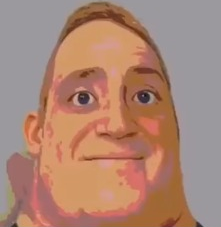

🧹Elimanmos espacios en blanco, ponemos la primera letra en mayuscula.

``Strip``: Remueve los espacios que estan al principio o al final de un string

In [ ]:
columnas = [nombre.strip().capitalize().replace(' ','_').replace('.','_') for nombre in columnas]
columnas

['Fecha',
 'Tipo',
 'Tipo_comprobante',
 'Codigo',
 'Descripcion',
 'Cantidad',
 'Precio',
 'Idrubro']

**CORRELACION**

In [ ]:
correlacion = df['cantidad'].corr(df['precio'])
print(correlacion)

nan


In [ ]:
print(df['cantidad'].isnull().sum())
print(df['precio'].isnull().sum())

0
0


In [ ]:
df.columns

Index(['fecha', 'tipo', 'codigo', 'descripcion', 'cantidad', 'precio',
       'idrubro', 'Nombre_mes'],
      dtype='object')

tenemos que condicionar el analisis por mes







Ahora puede utilizar la función groupby()para agrupar los datos por mes y realizar el cálculo que desea. Por ejemplo, para obtener la suma de la columna "Precio" por mes, puedes hacer lo siguiente:

In [ ]:
df_por_mes = df.groupby('Nombre_mes')['precio'].sum()
df_por_mes


Nombre_mes
April         40758.000
December     102271.449
February     145462.050
January      172231.568
March        217381.853
November     180140.483
October      136136.465
September     49630.086
Name: precio, dtype: float64

ahora para saber los tipos de pagos consultamos los datos de la columna "tipo"

In [ ]:
tipos_de_pago = df['tipo'].unique()
print(tipos_de_pago)


['Cta. Cte.' 'Contado' 'Transferencia' 'Tarjeta Débito' 'Mixta'
 'Tarjeta Crédito' 'Mercado Pago']


In [ ]:
df


,fecha,tipo,codigo,descripcion,cantidad,precio,idrubro,Nombre_mes
0,2023-04-17,Cta. Cte.,5411786063519,Tabaco Flandria Silver,1.0,792.0,174,April
1,2023-04-17,Contado,009,NAMASTE TRICO + 100g,1.0,810.0,213,April
2,2023-04-17,Contado,8414606516469,TOP CROP TOP BUD 100ml,1.0,3600.0,213,April
3,2023-04-17,Contado,P1,REPUESTO REJILLA PIPA X5,1.0,135.0,215,April
4,2023-04-17,Contado,bluntrey,filtro troquelado,1.0,180.0,214,April
...,...,...,...,...,...,...,...,...
1165,2022-09-19,Contado,1,filtros de plasticos,1.0,45.0,174,September
1166,2022-09-19,Contado,1,filtros de plasticos,1.0,45.0,174,September
1167,2022-09-19,Contado,0019,AZTEKA BUDHA JUICE 250ml,1.0,1300.0,213,September
1168,2022-09-17,Contado,ZEUS CLASIC,CELULOSA ZEUS CLASIC,1.0,250.0,214,September


In [ ]:
ataques.loc[~(ataques.loc[:,'Href_formula'] == ataques.loc[:,'Href']),:]

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal,Time,Species,Investigator_or_source,Pdf,Href_formula,Href,Case_number_1,Case_number_2,Original_order
49,2018.01.13,13-Jan-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Martin Islet,Free diving,Callum Stewart,M,...,N,NaN,White shark| 3.5 m,B. Myatt| GSAF,2018.01.13-Stewart.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.01.13-Stewart.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2018.01.13-Stewart.pdf,2018.01.13,2018.01.13,6253.0
91,2017.08.29,29-Aug-2017,2017.0,Unprovoked,AUSTRALIA,Victoria,Cathedral Rock,Surfing,Marcel Brundler,M,...,N,10h30,White shark| 3 m,B. Myatt| GSAF,2017.08.27-Brundler.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.08.27-Brundler.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.08.27-Brundler.pdf,2017.08.29,2017.08.29,6207.0
124,2017.06.05,2017.06.05,2017.0,Unprovoked,FRENCH POLYNESIA,Marquesas,Atuona Bay| Hiva Oa Island,Surfing,male,M,...,N,NaN,NaN,Tahiti Infos| 6/6/2017,2017.06.05-FrenchPolynesia.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.05-FrenchPolynesia.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.05-FrenchPolynesia.pdf,2017.06.05,2017.06.05,6172.0
125,2017.06.11,11-Jun-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,Point Casuarina| Bunbury,Body boarding,Paul Goff,M,...,N,08h30,White shark| 4 m,WA Today| 6/11/2017,2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.11-Goff.pdf,2017.06.11,2017.06.11,6170.0
133,2017.05.27,27-May-2017,2017.0,Invalid,AUSTRALIA,New South Wales,Evans Head,Fishing,Terry Selwood,M,...,N,NaN,NaN,B. Myatt| GSAF,2017.05.27-Selwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.05.27-Selwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.05.27-Selwood.pdf,2017.05.27,2017.05.27,6162.0
158,2017.03.19,19-Mar-2017,2017.0,Unprovoked,AUSTRALIA,New South Wales,The Farm,Body boarding,Gonzalo Fernandez,M,...,N,18h30,NaN,Illawarra Mercury| 1/19/2017,2017.03.19-Fernandez.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.03.19-Fernandez.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.03.19-Fernandez.pdf,2017.03.19,2017.03.19,6135.0
220,2016.07.29,29-Jul-2016,2016.0,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,male,M,...,N,11h30,Blue shark,Informacion.es| 7/29/2016,2016.07.29-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.29-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.29-Spain.pdf,2016.07.29,2016.07.29,6069.0
227,2016.07.23.a,23-Jul-2016,2016.0,Unprovoked,BAHAMAS,Abaco Islands,Green Turtle Cay,Spearfishing,Steve Cutbirth,M,...,N,NaN,Bull shark| 6',KWTX| 7/23/2016,2016.07.23.a-Cutbirth.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.23.a-Cutbirth.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.07.23-Cutbirth.pdf,2016.07.23.a,2016.07.23.a,6062.0
262,2016.05.21.a,21-May-2016,2016.0,Unprovoked,USA,Florida,Hugenot Beach | Jacksonville| Duval County,Swimming,female,F,...,N,17h46,NaN,Action News Jax| 5/23/2016,2016.05.21.a-Girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2016.05.21.a-Girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2016.05.21.a-Girl.pdf,2016.05.21.a,2016.05.21.a,6027.0
306,2015.12.21.a,21-Dec-2015,2015.0,Unprovoked,BRAZIL,Pernambuco,Fernano de Noronha,Scuba diving,M�rcio de Castro Pa

🧹 Vemos que las columnas ``Href_formula`` y ``Href`` estan duplicadas o cuando no estan duplicadas es porque alguna esta mal escrita. Podriamos eliminar una sola, pero como no vamos a utilizar los links a los PDF porque no vamos a hacer NLP, directamente eliminamos ambas columnas ya que no van a formar parte del analisis.

Otras columnas que no nos interesan:

- ``Pdf``: no nos va a servir de nada saber el nombre del PDF
- ``Case_number``: nos quedamos con la otra columna de fecha
- ``Case_number_1'``, ``'Case_number_2'``, ``'Original_order'``: columnas que tampoco sirven

In [ ]:
ataques.drop(['Case_number','Pdf','Case_number_1','Case_number_2','Original_order','Href_formula','Href'],axis=1,inplace=True)


In [ ]:
ataques.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_source
0,25-Jun-2018,2018.0,Boating,USA,California,Oceanside| San Diego County,Paddling,Julie Wolfe,F,57,No injury to occupant| outrigger canoe and paddle damaged,N,18h00,White shark,R. Collier| GSAF
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,St. Simon Island| Glynn County,Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,K.McMurray| TrackingSharks.com
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Habush| Oahu,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,K.McMurray| TrackingSharks.com
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,B. Myatt| GSAF
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger shark| 3m,A .Kipper


🧹 Columnas de años: tiramos un unique() para ver que onda

In [ ]:
ataques.Year.unique()

Out[277]: array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       189

🧹 Deberíamos acomodar la columna de Year ya que le esta como Float

In [ ]:
ataques['Year'] = ataques['Year'].apply(lambda x: int(x))

In [ ]:
ataques.Year.unique()

Out[279]: array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987,
       1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975,
       1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871

🧹 Tiene logica que exista registros con año cero? Vamos a investigar

In [ ]:
ataques.loc[ataques['Year']==0,:]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_source
5253,Ca. 336.B.C..,0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious ceremony,A candidate for initiation,M,NaN,"FATAL| shark ""bit off all lower parts of him up to the belly""",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (Phoecion 28)
5254,Ca. 725 B.C.,0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno| Ischia,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a shark/s,Y,NaN,NaN,V.M. Coppleson (1958)| p.262| et al
5255,1990 or 1991,0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Conway Plough & Dr. Jonathan Higgs,M,NaN,Conway's leg was bitten Higgs injury was FATAL,N,NaN,NaN,A.J. Venter
5256,Before 2016,0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Hamisi Njenga,M,NaN,FATAL,Y,NaN,NaN,eadestination
5257,Before Oct-2009,0,Unprovoked,PANAMA,Bocas del Toro Province,Red Frog Beach,Swimming/,male,M,20,FATAL,Y,NaN,NaN,C. Mendieta & A. Duarte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,Before 19-Jul-1913,0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,NaN,FATAL| leg stripped of flesh,Y,NaN,NaN,Rural New Yorker| 7/19/1913
5330,Before 1906,0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt out of the water and seized the boy but species identification is questionable,L. Becke in New York Sun| 9/9/1906; L. Schultz & M. Malin| p.523
5331,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,H. Taunton; N. Bartlett| p. 234
5332,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,F. Schwartz| p.23; C. Creswell| GSAF


🧹 Hay lineas que tienen 0 en ``Year`` pero en ``Date`` si tienen mas información, podriamos rellenar estos casos de la columna ``Year`` con la info de ``Date``

Vamos a tirar unique a la columna ``Date`` para ver si tiene los datos de forma descente (spoiler: no los tiene)

In [ ]:
list(ataques.Date.unique())

Out[281]: ['25-Jun-2018',
 '18-Jun-2018',
 '09-Jun-2018',
 '08-Jun-2018',
 '04-Jun-2018',
 '03-Jun-2018',
 '27-May-2018',
 '26-May-2018',
 '24-May-2018',
 '21-May-2018',
 '13-May-2018',
 'May 2018',
 '12-May-2018',
 '09-May-2018',
 'Reported 30-Apr-2018',
 '28-Apr-2018',
 '25-Apr-2018',
 '24-Apr-2018',
 '23-Apr-2018',
 '22-Apr-2018',
 '19-Apr-2018',
 '15-Apr-2018',
 '14-Apr-2018',
 'Reported 10-Apr-2018',
 '05-Apr-2018',
 '03-Apr-2018',
 '31-Mar-2018',
 '14-Mar-2018',
 '9-Mar-2018',
 '24-Feb-2018',
 '23-Feb-2018',
 '18-Feb-2018',
 '15-Feb-2018',
 '14-Feb-2018',
 '11-Feb-2018',
 '03-Feb-2018',
 '01-Feb-2018',
 '28-Jan-2018',
 '21-Jan-2018',
 '14-Jan-2018',
 '13-Jan-2018',
 '12-Jan-2018',
 '05-Jan-2018',
 '31-Dec-2017',
 '30-Dec-2017',
 '21-Dec-2017',
 '09-Dec-2017',
 '30-Nov-2017',
 '24-Nov-2017',
 '18-Nov-2017',
 '13-Nov-2017',
 '04-Nov-2017',
 'Reported 31-Oct-2017',
 '28-Oct-2017',
 '26-Oct-2017',
 '23-Oct-2017',
 '22-Oct-2017',
 '21-Oct-2017',
 '18-Oct-2017',
 '09-Oct-2017',
 '05-Oc

🧹 Vemos que la estructura que deberia tener ``Date`` es de **28-may-2017**, pero algunos tienen diferentes: 'Reported 09-Mar-2017', '29-Apr-17'  'may-18'

Empezamos eliminando el 'Reported'

Las **expresiones regulares**, a menudo llamadas también **regex**, son unas secuencias de caracteres que forma un patrón de búsqueda, las cuales son formalizadas por medio de una sintaxis específica.

In [ ]:
import re
re.sub('abc','','abc pepe')           # Delete pattern abc

Out[282]: ' pepe'

In [ ]:
re.sub('abc\s','','abc pepe')

Out[283]: 'pepe'

In [ ]:
line = re.sub('Reported\s','','Reported 09-Mar-2017')
line

Out[284]: '09-Mar-2017'

In [ ]:
ataques.Date = ataques.Date.replace(regex='Reported\s',value='')

In [ ]:
list(ataques.Date.unique())

Out[286]: ['25-Jun-2018',
 '18-Jun-2018',
 '09-Jun-2018',
 '08-Jun-2018',
 '04-Jun-2018',
 '03-Jun-2018',
 '27-May-2018',
 '26-May-2018',
 '24-May-2018',
 '21-May-2018',
 '13-May-2018',
 'May 2018',
 '12-May-2018',
 '09-May-2018',
 '30-Apr-2018',
 '28-Apr-2018',
 '25-Apr-2018',
 '24-Apr-2018',
 '23-Apr-2018',
 '22-Apr-2018',
 '19-Apr-2018',
 '15-Apr-2018',
 '14-Apr-2018',
 '10-Apr-2018',
 '05-Apr-2018',
 '03-Apr-2018',
 '31-Mar-2018',
 '14-Mar-2018',
 '9-Mar-2018',
 '24-Feb-2018',
 '23-Feb-2018',
 '18-Feb-2018',
 '15-Feb-2018',
 '14-Feb-2018',
 '11-Feb-2018',
 '03-Feb-2018',
 '01-Feb-2018',
 '28-Jan-2018',
 '21-Jan-2018',
 '14-Jan-2018',
 '13-Jan-2018',
 '12-Jan-2018',
 '05-Jan-2018',
 '31-Dec-2017',
 '30-Dec-2017',
 '21-Dec-2017',
 '09-Dec-2017',
 '30-Nov-2017',
 '24-Nov-2017',
 '18-Nov-2017',
 '13-Nov-2017',
 '04-Nov-2017',
 '31-Oct-2017',
 '28-Oct-2017',
 '26-Oct-2017',
 '23-Oct-2017',
 '22-Oct-2017',
 '21-Oct-2017',
 '18-Oct-2017',
 '09-Oct-2017',
 '05-Oct-2017',
 '01-Oct-2017',
 '

El modulo **dataprep.clean** pone a disposicion funciones para limpiar de forma rapida y facil los datos.

Este modulo necesita tener instalado Microsoft Visual C++ 14.0, en este video se explica como realizar esta instalacion: https://www.youtube.com/watch?v=rcI1_e38BWs

Vamos a utilizar la funcion ``clean_date``, vayamos a la documentacion para investigar que hace:

https://docs.dataprep.ai/user_guide/clean/clean_date.html?highlight=clean_date

In [ ]:
!pip install dataprep 

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4c511d56-a65f-4f69-80d8-abb42eb83096/bin/python -m pip install --upgrade pip' command.


In [ ]:
from dataprep.clean import clean_date

In [ ]:
ataques2 = clean_date(ataques,'Date')

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4c511d56-a65f-4f69-80d8-abb42eb83096/lib/python3.9/site-packages/dask/dataframe/core.py:6984: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<command-3305631872966930> in <cell line: 1>()
----> 1 ataques2 = clean_date(ataques,'Date')

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4c511d56-a65f-4f69-80d8-abb42eb83096/lib/python3.9/site-packages/dataprep/clean/clean_date.py in clean_date(df, column, output_format, input_timezone, output_timezone, fix_missing, infer_day_first, inplace, errors, report, progress)
    177 
    178     with ProgressBar(minimum=1, disable=not progress):
--> 179         df, stats = dask.compute(df, stats)
    180 
    181     # output a report describing the result of clean_country

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4c511d56-a65f-4f69-80d8-abb42eb83096/lib/python3.9/site-packages/dask/base.py in compute(traverse, optimize_graph, scheduler, get, *args, **kwargs)
    597         postcomputes.append(x.__dask_postcompute__())
    598 
--> 599     r

🧹 El codigo anterior tira un error, vamos a iterar hasta ver el registro erroneo

In [ ]:
ataques2 = clean_date(ataques.head(1294),'Date')

  0%|          | 0/8 [00:00<?, ?it/s]

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<command-3305631872966932> in <cell line: 1>()
----> 1 ataques2 = clean_date(ataques.head(1294),'Date')

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4c511d56-a65f-4f69-80d8-abb42eb83096/lib/python3.9/site-packages/dataprep/clean/clean_date.py in clean_date(df, column, output_format, input_timezone, output_timezone, fix_missing, infer_day_first, inplace, errors, report, progress)
    177 
    178     with ProgressBar(minimum=1, disable=not progress):
--> 179         df, stats = dask.compute(df, stats)
    180 
    181     # output a report describing the result of clean_country

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4c511d56-a65f-4f69-80d8-abb42eb83096/lib/python3.9/site-packages/dask/base.py in compute(traverse, optimize_graph, scheduler, get, *args, **kwargs)
    597         postcomputes.append(x.__dask_postcompute__())
    598 
--

In [ ]:
ataques.shape

Out[291]: (5334, 15)

🧹 El error esta en el registro 1293

In [ ]:
ataques.iloc[1293,:]

Out[292]: Date                                             19-Jul-2007.a
Year                                                      2007
Type                                                Unprovoked
Country                                              AUSTRALIA
Area                      Territory of Cocos (Keeling) Islands
Location                                      Direction Island
Activity                                                Wading
Name                                             Angus Chapman
Sex                                                          M
Age                                                         15
Injury                                             Calf bitten
Fatal                                                        N
Time                                                     11h00
Species                            Bronze whaler shark| 1.5 m 
Investigator_or_source       The Western Australian| 7/20/2007
Name: 1293, dtype: object

In [ ]:
ataques.iloc[1293,0]

Out[293]: '19-Jul-2007.a'

🧹 Le sacamos el **.a**

In [ ]:
ataques.iloc[1293,0] = '19-Jul-2007'

🧹 Vamos a pasar otra vez clean_date

In [ ]:
ataques2 = clean_date(ataques, 'Date')

  0%|          | 0/8 [00:00<?, ?it/s]

Dates Cleaning Report:
	5143 values cleaned (96.42%)
	191 values unable to be parsed (3.58%), set to NaN
Result contains 5143 (96.42%) values in the correct format and 191 null values (3.58%)


🧹 Vemos que las fechas con este formato 25-jun-18 no son reconocidas por la funcion de limpieza, vamos a tener que cambiar el formato

In [ ]:
ataques2.head(50)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_source,Date_clean
0,25-Jun-2018,2018,Boating,USA,California,Oceanside| San Diego County,Paddling,Julie Wolfe,F,57,No injury to occupant| outrigger canoe and paddle damaged,N,18h00,White shark,R. Collier| GSAF,2018-06-25 00:00:00
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,St. Simon Island| Glynn County,Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,K.McMurray| TrackingSharks.com,2018-06-18 00:00:00
2,09-Jun-2018,2018,Invalid,USA,Hawaii,Habush| Oahu,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,K.McMurray| TrackingSharks.com,2018-06-09 00:00:00
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,B. Myatt| GSAF,2018-06-08 00:00:00
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger shark| 3m,A .Kipper,2018-06-04 00:00:00
5,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Flat Rock| Ballina,Kite surfing,Chris �,M,NaN,No injury| board bitten,N,NaN,NaN,Daily Telegraph| 6/4/2018,2018-06-03 00:00:00
6,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,Piedade Beach| Recife,Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,Diario de Pernambuco| 6/4/2018,2018-06-03 00:00:00
7,27-May-2018,2018,Unprovoked,USA,Florida,Lighhouse Point Park| Ponce Inlet| Volusia County,Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,Lemon shark| 3',K. McMurray| TrackingSharks.com,2018-05-27 00:00:00
8,26-May-2018,2018,Unprovoked,USA,Florida,Cocoa Beach| Brevard County,Walking,Cody High,M,15,Lower left leg bitten,N,17h00,Bull shark| 6',K.McMurray| TrackingSharks.com,2018-05-26 00:00:00
9,26-May-2018,2018,Unprovoked,USA,Florida,Daytona Beach| Volusia County,Standing,male,M,12,Minor injury to foot,N,14h00,NaN,K. McMurray| Tracking Sharks.com,2018-05-26 00:00:00


In [ ]:
ataques2.loc[ataques2['Date_clean'].isna(),:]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_source,Date_clean
402,20-May2015,2015,Unprovoked,USA,Florida,New Smyrna Beach| Volusia County,Surfing,Matthew Zaccaria,M,18,2 puncture wounds to dorsum of left foot,N,10h30,5' shark,WFTV| 5/20/2015,NaN
528,13-May2014,2014,Unprovoked,USA,Florida,Jacksonville Beach| Duval County,Wading,Mihaela Cosa,F,44,Lacerations and puncture wounds to right foot,N,11h00,NaN,M. Michaelson| Shark Research Institute,NaN
565,29-Nov2013,2013,Unprovoked,USA,Hawaii,Keawekapu Beach| Kihei| Maui,Snorkeling,female,F,58,Right calf bitten,N,13h00,NaN,L. Fujimoto| Maui News| 11/29/2013,NaN
987,190Feb-2010,2010,Unprovoked,NEW ZEALAND,South Island,Tahunanui Beach,Swimming,Paul Baird,M,NaN,Bruised but otherwise unhurt,N,Night,Possibly a blue shark,Nelson Mail| 2/23/2010,NaN
1179,Late Jul-2008,2008,Boating,UNITED KINGDOM,Sussex,Rock-a-Nore| Hastings,Rowing an inflatable dinghy,Occupants: Luke Jones & James Sequin,M,16,Shark leapt into & damaged the dinghy but no injury to occupants,N,NaN,Starry smoothhound shark| 1m,Hastings Observer| 8/1/2008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,Before 19-Jul-1913,0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,NaN,FATAL| leg stripped of flesh,Y,NaN,NaN,Rural New Yorker| 7/19/1913,NaN
5330,Before 1906,0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt out of the water and seized the boy but species identification is questionable,L. Becke in New York Sun| 9/9/1906; L. Schultz & M. Malin| p.523,NaN
5331,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,H. Taunton; N. Bartlett| p. 234,NaN
5332,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,F. Schwartz| p.23; C. Creswell| GSAF,NaN


In [ ]:
pd.to_datetime(ataques2.head(1).Date , format='%d-$b-%y', errors='ignore')

Out[298]: 0    25-Jun-2018
Name: Date, dtype: object

In [ ]:
def custom_date(date):
    date_time = pd.to_datetime(date , format='%d-$b-%y', errors='ignore')
    return date_time

ataques.Date = ataques.Date.apply(custom_date)
ataques.head(10)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_source
0,25-Jun-2018,2018,Boating,USA,California,Oceanside| San Diego County,Paddling,Julie Wolfe,F,57,No injury to occupant| outrigger canoe and paddle damaged,N,18h00,White shark,R. Collier| GSAF
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,St. Simon Island| Glynn County,Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,K.McMurray| TrackingSharks.com
2,09-Jun-2018,2018,Invalid,USA,Hawaii,Habush| Oahu,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,K.McMurray| TrackingSharks.com
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,B. Myatt| GSAF
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger shark| 3m,A .Kipper
5,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Flat Rock| Ballina,Kite surfing,Chris �,M,NaN,No injury| board bitten,N,NaN,NaN,Daily Telegraph| 6/4/2018
6,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,Piedade Beach| Recife,Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,Diario de Pernambuco| 6/4/2018
7,27-May-2018,2018,Unprovoked,USA,Florida,Lighhouse Point Park| Ponce Inlet| Volusia County,Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,Lemon shark| 3',K. McMurray| TrackingSharks.com
8,26-May-2018,2018,Unprovoked,USA,Florida,Cocoa Beach| Brevard County,Walking,Cody High,M,15,Lower left leg bitten,N,17h00,Bull shark| 6',K.McMurray| TrackingSharks.com
9,26-May-2018,2018,Unprovoked,USA,Florida,Daytona Beach| Volusia County,Standing,male,M,12,Minor injury to foot,N,14h00,NaN,K. McMurray| Tracking Sharks.com


In [ ]:
ataques2.loc[ataques2['Date_clean'].isna(),:]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_source,Date_clean
402,20-May2015,2015,Unprovoked,USA,Florida,New Smyrna Beach| Volusia County,Surfing,Matthew Zaccaria,M,18,2 puncture wounds to dorsum of left foot,N,10h30,5' shark,WFTV| 5/20/2015,NaN
528,13-May2014,2014,Unprovoked,USA,Florida,Jacksonville Beach| Duval County,Wading,Mihaela Cosa,F,44,Lacerations and puncture wounds to right foot,N,11h00,NaN,M. Michaelson| Shark Research Institute,NaN
565,29-Nov2013,2013,Unprovoked,USA,Hawaii,Keawekapu Beach| Kihei| Maui,Snorkeling,female,F,58,Right calf bitten,N,13h00,NaN,L. Fujimoto| Maui News| 11/29/2013,NaN
987,190Feb-2010,2010,Unprovoked,NEW ZEALAND,South Island,Tahunanui Beach,Swimming,Paul Baird,M,NaN,Bruised but otherwise unhurt,N,Night,Possibly a blue shark,Nelson Mail| 2/23/2010,NaN
1179,Late Jul-2008,2008,Boating,UNITED KINGDOM,Sussex,Rock-a-Nore| Hastings,Rowing an inflatable dinghy,Occupants: Luke Jones & James Sequin,M,16,Shark leapt into & damaged the dinghy but no injury to occupants,N,NaN,Starry smoothhound shark| 1m,Hastings Observer| 8/1/2008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,Before 19-Jul-1913,0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,NaN,FATAL| leg stripped of flesh,Y,NaN,NaN,Rural New Yorker| 7/19/1913,NaN
5330,Before 1906,0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt out of the water and seized the boy but species identification is questionable,L. Becke in New York Sun| 9/9/1906; L. Schultz & M. Malin| p.523,NaN
5331,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,H. Taunton; N. Bartlett| p. 234,NaN
5332,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,F. Schwartz| p.23; C. Creswell| GSAF,NaN


🧹Ahora volvemos a pasar la funcion

In [ ]:
ataques2 = clean_date(ataques, 'Date', output_format='YYYY-MM-DD')

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4c511d56-a65f-4f69-80d8-abb42eb83096/lib/python3.9/site-packages/dask/dataframe/core.py:6984: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

Dates Cleaning Report:
	5143 values cleaned (96.42%)
	191 values unable to be parsed (3.58%), set to NaN
Result contains 5143 (96.42%) values in the correct format and 191 null values (3.58%)


In [ ]:
ataques2

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_source,Date_clean
0,25-Jun-2018,2018,Boating,USA,California,Oceanside| San Diego County,Paddling,Julie Wolfe,F,57,No injury to occupant| outrigger canoe and paddle damaged,N,18h00,White shark,R. Collier| GSAF,2018-06-25
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,St. Simon Island| Glynn County,Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,K.McMurray| TrackingSharks.com,2018-06-18
2,09-Jun-2018,2018,Invalid,USA,Hawaii,Habush| Oahu,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,K.McMurray| TrackingSharks.com,2018-06-09
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,B. Myatt| GSAF,2018-06-08
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger shark| 3m,A .Kipper,2018-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,Before 19-Jul-1913,0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,NaN,FATAL| leg stripped of flesh,Y,NaN,NaN,Rural New Yorker| 7/19/1913,NaN
5330,Before 1906,0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt out of the water and seized the boy but species identification is questionable,L. Becke in New York Sun| 9/9/1906; L. Schultz & M. Malin| p.523,NaN
5331,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,H. Taunton; N. Bartlett| p. 234,NaN
5332,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,F. Schwartz| p.23; C. Creswell| GSAF,NaN


In [ ]:
191*100/5334

Out[303]: 3.5808023997000373

🧹Todavia existen registros que no pudieron ser reconocidos por la funcion, en este caso, los eliminamos:

In [ ]:
ataques2.loc[ataques2['Date_clean'].isnull()].

  File "<command-3305631872966952>", line 1
    ataques2.loc[ataques2['Date_clean'].isnull()].
                                                  ^
SyntaxError: invalid syntax


In [ ]:
ataques2 = ataques2.loc[~ataques2['Date_clean'].isnull()]

In [ ]:
ataques2.shape

Out[306]: (5143, 16)

🧹 Eliminamos la columna ``Date`` porque ya tengo ``Date_clean``

In [ ]:
ataques2.drop('Date',axis=1,inplace=True)

/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


🧹 ¿Que tipo de dato es la columna ``Date_clean``? Deberia ser de tipo fecha (datetime)

In [ ]:
ataques2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5143 entries, 0 to 5249
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    5143 non-null   int64 
 1   Type                    5142 non-null   object
 2   Country                 5141 non-null   object
 3   Area                    5047 non-null   object
 4   Location                5009 non-null   object
 5   Activity                4998 non-null   object
 6   Name                    5120 non-null   object
 7   Sex                     4931 non-null   object
 8   Age                     3360 non-null   object
 9   Injury                  5141 non-null   object
 10  Fatal                   4789 non-null   object
 11  Time                    2881 non-null   object
 12  Species                 3107 non-null   object
 13  Investigator_or_source  5138 non-null   object
 14  Date_clean              5143 non-null   object
dtypes: i

🧹 Pasamos a datetime la columna ``Date_clean``

In [ ]:
ataques2['Date_clean'] = pd.to_datetime(ataques2['Date_clean'])

<command-3305631872966960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ataques2['Date_clean'] = pd.to_datetime(ataques2['Date_clean'])


In [ ]:
ataques2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5143 entries, 0 to 5249
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Year                    5143 non-null   int64         
 1   Type                    5142 non-null   object        
 2   Country                 5141 non-null   object        
 3   Area                    5047 non-null   object        
 4   Location                5009 non-null   object        
 5   Activity                4998 non-null   object        
 6   Name                    5120 non-null   object        
 7   Sex                     4931 non-null   object        
 8   Age                     3360 non-null   object        
 9   Injury                  5141 non-null   object        
 10  Fatal                   4789 non-null   object        
 11  Time                    2881 non-null   object        
 12  Species                 3107 non-null   object  

🧹 Vamos a crear dos columnas nuevas, una para el **año** y otra para el **mes**, ambas extraidas de ``Date_clean``

In [ ]:
ataques2['Year'] = pd.DatetimeIndex(ataques2['Date_clean']).year
ataques2['Month'] = pd.DatetimeIndex(ataques2['Date_clean']).month

<command-3305631872966963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ataques2['Year'] = pd.DatetimeIndex(ataques2['Date_clean']).year
<command-3305631872966963>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ataques2['Month'] = pd.DatetimeIndex(ataques2['Date_clean']).month


🧹 Esto es posible hacer porque pasamos el tipo de dato a ``datetime``

In [ ]:
ataques2.head()

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_source,Date_clean,Month
0,2018,Boating,USA,California,Oceanside| San Diego County,Paddling,Julie Wolfe,F,57,No injury to occupant| outrigger canoe and paddle damaged,N,18h00,White shark,R. Collier| GSAF,2018-06-25,6
1,2018,Unprovoked,USA,Georgia,St. Simon Island| Glynn County,Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,K.McMurray| TrackingSharks.com,2018-06-18,6
2,2018,Invalid,USA,Hawaii,Habush| Oahu,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,K.McMurray| TrackingSharks.com,2018-06-09,6
3,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,B. Myatt| GSAF,2018-06-08,6
4,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger shark| 3m,A .Kipper,2018-06-04,6


🧹 Vamos a ordenar las columnas

In [ ]:
columnas = list(ataques2.columns)

for columna in ['Month','Date_clean']:
    columnas.remove(columna)
    columnas.insert(0,columna)
columnas

Out[313]: ['Date_clean',
 'Month',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex',
 'Age',
 'Injury',
 'Fatal',
 'Time',
 'Species',
 'Investigator_or_source']

In [ ]:
atk = ataques2.loc[:,columnas]

In [ ]:
atk.head()

,Date_clean,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_source
0,2018-06-25,6,2018,Boating,USA,California,Oceanside| San Diego County,Paddling,Julie Wolfe,F,57,No injury to occupant| outrigger canoe and paddle damaged,N,18h00,White shark,R. Collier| GSAF
1,2018-06-18,6,2018,Unprovoked,USA,Georgia,St. Simon Island| Glynn County,Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,K.McMurray| TrackingSharks.com
2,2018-06-09,6,2018,Invalid,USA,Hawaii,Habush| Oahu,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,K.McMurray| TrackingSharks.com
3,2018-06-08,6,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,B. Myatt| GSAF
4,2018-06-04,6,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger shark| 3m,A .Kipper


🧹 Ya borramos bastantes nulos, arreglamos las fechas, mejoramos el ordenen de las columnas y su nombre, ademas eliminamos columnas innecesarias. Ahora vamos a por la columna country

In [ ]:
atk.Country.unique()

Out[316]: array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'ECUADOR',
       'NEW CALEDONIA', 'MALAYSIA', 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SAMOA', 'JAPAN', 'EGYPT',
       'ST HELENA| British overseas territory', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'Fiji',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE',
       'PUERTO RICO', 'ITALY', 'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA',
       'KIRIBATI', 'ISRAEL', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'SEYCHELLES', 'NIGERIA', 'TONGA', 'SCOTLAND', 'TRINIDAD & TOBAGO',
       'CANADA', 'FIJI', 'SAUDI ARABIA', 'CHILE', 'TAIWAN', 'ANTIGUA',
       'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB EMIRATES (UAE)',
       'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR', 'GUAM', 'PANAMA',
       'SOLOMON ISLANDS', 'AZORES', '

🧹 Parece bastante descente, vamos a capitalizar las primera letras de cada palabra, lo demas minuscula

In [ ]:
atk['Country'] = atk['Country'].apply(lambda x: str(x).strip().title())

🧹 Para super asegurarnos de que los paises estan bien, vamos a comparar con otro dataset de paises

In [ ]:
paises = pd.read_csv('https://raw.githubusercontent.com/PPereyraAN/Cursos/main/paises.csv',encoding = 'utf-8',sep=';')

In [ ]:
paises

,Country,Code
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO
...,...,...
190,Venezuela,VE
191,Vietnam,VN
192,Yemen,YE
193,Zambia,ZM


In [ ]:
paises.columns = ['Pais']

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<command-3305631872966977> in <cell line: 1>()
----> 1 paises.columns = ['Pais']

/databricks/python/lib/python3.9/site-packages/pandas/core/generic.py in __setattr__(self, name, value)
   5498         try:
   5499             object.__getattribute__(self, name)
-> 5500             return object.__setattr__(self, name, value)
   5501         except AttributeError:
   5502             pass

/databricks/python/lib/python3.9/site-packages/pandas/_libs/properties.pyx in pandas._libs.properties.AxisProperty.__set__()

/databricks/python/lib/python3.9/site-packages/pandas/core/generic.py in _set_axis(self, axis, labels)
    764     def _set_axis(self, axis: int, labels: Index) -> None:
    765         labels = ensure_index(labels)
--> 766         self._mgr.set_axis(axis, labels)
    767         self._clear_item_cache()
    768 

/databricks/p

In [ ]:
paises.drop('Code',axis=1,inplace=True)

🧹 La idea es hacer un **Left Join**, lo que quede Nulo significa que no pudo enlazar con la tabla de Paises, lo que nos va a hacer sospechar que el pais esta mal escrito.

In [ ]:
%sql
SELECT * FROM ATK
LEFT JOIN PAISES ON ATK.COUNTRY = PAISES.COUNTRY

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
<command-3305631872966980> in <cell line: 1>()
      5     display(df)
      6     return df
----> 7   _sqldf = ____databricks_percent_sql()
      8 finally:
      9   del ____databricks_percent_sql

<command-3305631872966980> in ____databricks_percent_sql()
      2   def ____databricks_percent_sql():
      3     import base64
----> 4     df = spark.sql(base64.standard_b64decode("U0VMRUNUICogRlJPTSBBVEsKTEVGVCBKT0lOIFBBSVNFUyBPTiBBVEsuQ09VTlRSWSA9IFBBSVNFUy5DT1VOVFJZ").decode())
      5     display(df)
      6     return df

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_

In [ ]:
atk2 = pd.merge(atk,paises, how='left', left_on='Country', right_on='Pais')

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<command-3305631872966981> in <cell line: 1>()
----> 1 atk2 = pd.merge(atk,paises, how='left', left_on='Country', right_on='Pais')

/databricks/python/lib/python3.9/site-packages/pandas/core/reshape/merge.py in merge(left, right, how, on, left_on, right_on, left_index, right_index, sort, suffixes, copy, indicator, validate)
    104     validate: str | None = None,
    105 ) -> DataFrame:
--> 106     op = _MergeOperation(
    107         left,
    108         right,

/databricks/python/lib/python3.9/site-packages/pandas/core/reshape/merge.py in __init__(self, left, right, how, on, left_on, right_on, axis, left_index, right_index, sort, suffixes, copy, indicator, validate)
    697             self.right_join_keys,
    698             self.join_names,
--> 699         ) = self._get_merge_keys()
    700 
    701         # validate the merge 

🧹 Vemos los paises que no lograron enlazar

In [ ]:
atk2.head()

,Date_clean,Month,Year,Type,Activity,Sex,Age,Injury,Fatal,Species,Pais
1,2018-06-18,6,2018,Unprovoked,standing,F,11,injury,N,NaN,United States of America
2,2018-06-09,6,2018,Invalid,surf,M,48,injury,N,NaN,United States of America
3,2018-06-08,6,2018,Unprovoked,surf,M,NaN,injury,N,NaN,Australia
4,2018-06-04,6,2018,Provoked,diving,M,NaN,injury,N,tiger,Mexico
5,2018-06-03,6,2018,Unprovoked,surf,M,NaN,no injury,N,NaN,Australia


In [ ]:
atk2.loc[atk2['Pais'].isnull(),:].Country.unique()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<command-3305631872966984> in <cell line: 1>()
----> 1 atk2.loc[atk2['Pais'].isnull(),:].Country.unique()

/databricks/python/lib/python3.9/site-packages/pandas/core/generic.py in __getattr__(self, name)
   5485         ):
   5486             return self[name]
-> 5487         return object.__getattribute__(self, name)
   5488 
   5489     def __setattr__(self, name: str, value) -> None:

AttributeError: 'DataFrame' object has no attribute 'Country'

🧹 Hacemos una funcion para "arreglar" el nombre de algunos paises

In [ ]:
def mod_paises(string):
    if "Usa" == string:
        string = "United States of America"
    if string == "England":
        string = "United Kingdom"
    if string == "Columbia":
        string = "Colombia"
    if string == "Scotland":
        string = "United Kingdom"
    if string == "Okinawa":
        string = "Japan"
    else:
        return string

In [ ]:
atk['Country'] = atk['Country'].apply(lambda x: mod_paises(x))

In [ ]:
atk2.loc[atk2['Pais'].isnull(),:].Country.unique()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<command-3305631872966988> in <cell line: 1>()
----> 1 atk2.loc[atk2['Pais'].isnull(),:].Country.unique()

/databricks/python/lib/python3.9/site-packages/pandas/core/generic.py in __getattr__(self, name)
   5485         ):
   5486             return self[name]
-> 5487         return object.__getattribute__(self, name)
   5488 
   5489     def __setattr__(self, name: str, value) -> None:

AttributeError: 'DataFrame' object has no attribute 'Country'

🧹 Volvemos a intentar hacer el Left Join

In [ ]:
atk2 = pd.merge(atk,paises, how='left', left_on='Country', right_on='Pais')

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<command-3305631872966990> in <cell line: 1>()
----> 1 atk2 = pd.merge(atk,paises, how='left', left_on='Country', right_on='Pais')

/databricks/python/lib/python3.9/site-packages/pandas/core/reshape/merge.py in merge(left, right, how, on, left_on, right_on, left_index, right_index, sort, suffixes, copy, indicator, validate)
    104     validate: str | None = None,
    105 ) -> DataFrame:
--> 106     op = _MergeOperation(
    107         left,
    108         right,

/databricks/python/lib/python3.9/site-packages/pandas/core/reshape/merge.py in __init__(self, left, right, how, on, left_on, right_on, axis, left_index, right_index, sort, suffixes, copy, indicator, validate)
    697             self.right_join_keys,
    698             self.join_names,
--> 699         ) = self._get_merge_keys()
    700 
    701         # validate the merge 

🧹 Nos fijamos otra vez cuales no matchearon

In [ ]:
atk2.loc[atk2['Pais'].isnull(),:].Country.unique()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<command-3305631872966992> in <cell line: 1>()
----> 1 atk2.loc[atk2['Pais'].isnull(),:].Country.unique()

/databricks/python/lib/python3.9/site-packages/pandas/core/generic.py in __getattr__(self, name)
   5485         ):
   5486             return self[name]
-> 5487         return object.__getattribute__(self, name)
   5488 
   5489     def __setattr__(self, name: str, value) -> None:

AttributeError: 'DataFrame' object has no attribute 'Country'

In [ ]:
atk2.loc[atk2['Country']=='St Helena| British Overseas Territory',:]
atk2.loc[[105,143], 'Country'] = 'St Helena, British Overseas Territory'

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/databricks/python/lib/python3.9/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3360             try:
-> 3361                 return self._engine.get_loc(casted_key)
   3362             except KeyError as err:

/databricks/python/lib/python3.9/site-packages/pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

/databricks/python/lib/python3.9/site-packages/pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'Country'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
<command-

🧹 Nos fijamos que cantidad del total representan

In [ ]:
atk2.shape

Out[332]: (4423, 11)

In [ ]:
atk2.Pais.isna().sum()

Out[333]: 0

In [ ]:
230*100/5143

Out[334]: 4.472097997277853

🧹Borramos todos los que no pudieron matchear

In [ ]:
atk2 = atk2.loc[~atk2['Pais'].isnull()]

In [ ]:
atk2.shape

Out[336]: (4423, 11)

🧹 Ahora vamos a ver la columna actividad

In [ ]:
list(atk2.Activity.unique())

Out[337]: ['standing',
 'surf',
 'diving',
 'swimming',
 'fishing',
 'walking',
 'boating',
 'sea disaster']

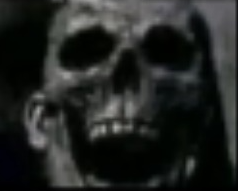

🧹 ¿Que pensas que esta mal en esta columna o en este dataset?

🧹 Vamos a hacer una funcion para limpiar esta columna

In [ ]:
def actividad(string):
    string = str(string).lower().strip()
    if any(word in string for word in ["swimming","bathing","floating","splashing","jumped into the water","playing"]):
        return "swimming"
    elif any(word in string for word in ["diving","snorkel"]):
        return "diving"
    elif "fishing" in string:
        return "fishing"
    elif any(word in string for word in ["surf", "body boarding","body-boarding", "boogie boarding", "paddleskiing" ]):
        return "surf"
    elif "standing" in string:
        return "standing"
    elif any(word in string for word in ["kayaking", "ship", "sail", "boat", "canoeing", "board", "rowing", "fell into the water"]):
        return "boating"
    elif "disaster" in string:
        return "sea disaster"
    elif any(word in string for word in ["wading", "walking", "treading water"]):
        return "walking"
    else:
        return np.nan

In [ ]:
atk2['Activity'] = atk2['Activity'].apply(lambda x: actividad(x))

🧹 Vemos cuantos no pudieron ser limpiados

In [ ]:
atk2['Activity'].isnull().sum()

Out[340]: 0

🧹 Eliminamos los registros que no pudieron ser limpiadops

In [ ]:
atk2 = atk2.loc[~atk2['Activity'].isnull(),:]

In [ ]:
atk2.shape

Out[342]: (4423, 11)

In [ ]:
atk2.head()

,Date_clean,Month,Year,Type,Activity,Sex,Age,Injury,Fatal,Species,Pais
1,2018-06-18,6,2018,Unprovoked,standing,F,11,injury,N,NaN,United States of America
2,2018-06-09,6,2018,Invalid,surf,M,48,injury,N,NaN,United States of America
3,2018-06-08,6,2018,Unprovoked,surf,M,NaN,injury,N,NaN,Australia
4,2018-06-04,6,2018,Provoked,diving,M,NaN,injury,N,tiger,Mexico
5,2018-06-03,6,2018,Unprovoked,surf,M,NaN,no injury,N,NaN,Australia


🧹 Como ya no confiamos en lo absoluto en la calidad de los datos, sabemos que las columnas Area y Location van a tener un formato denormalizado que seria extremadamente dificil normalizar, por eso vamos a borrar estas columnas, ademas no nos interesa el nombre ni la hora ni el investigador.

In [ ]:
atk2.drop(['Location', 'Area','Time','Name','Investigator_or_source'], axis = 1, inplace = True)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<command-3305631872967014> in <cell line: 1>()
----> 1 atk2.drop(['Location', 'Area','Time','Name','Investigator_or_source'], axis = 1, inplace = True)

/databricks/python/lib/python3.9/site-packages/pandas/util/_decorators.py in wrapper(*args, **kwargs)
    309                     stacklevel=stacklevel,
    310                 )
--> 311             return func(*args, **kwargs)
    312 
    313         return wrapper

/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py in drop(self, labels, axis, index, columns, level, inplace, errors)
   4904                 weight  1.0     0.8
   4905         """
-> 4906         return super().drop(
   4907             labels=labels,
   4908             axis=axis,

/databricks/python/lib/python3.9/site-packages/pandas/core/generic.py in drop(self, labels, axis, index, columns, level, i

In [ ]:
atk2.drop(['Name'], axis = 1, inplace = True)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<command-3305631872967076> in <cell line: 1>()
----> 1 atk2.drop(['Name'], axis = 1, inplace = True)

/databricks/python/lib/python3.9/site-packages/pandas/util/_decorators.py in wrapper(*args, **kwargs)
    309                     stacklevel=stacklevel,
    310                 )
--> 311             return func(*args, **kwargs)
    312 
    313         return wrapper

/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py in drop(self, labels, axis, index, columns, level, inplace, errors)
   4904                 weight  1.0     0.8
   4905         """
-> 4906         return super().drop(
   4907             labels=labels,
   4908             axis=axis,

/databricks/python/lib/python3.9/site-packages/pandas/core/generic.py in drop(self, labels, axis, index, columns, level, inplace, errors)
   4148         for axis, labels in

In [ ]:
atk2.head(2)

,Date_clean,Month,Year,Type,Activity,Sex,Age,Injury,Fatal,Species,Pais
1,2018-06-18,6,2018,Unprovoked,standing,F,11,injury,N,NaN,United States of America
2,2018-06-09,6,2018,Invalid,surf,M,48,injury,N,NaN,United States of America


🧹Falta que revisemos: Type, Sex, Age, Injury, Fatal y Species

🧹Empezamos con Type

Se define un incidente provocado como uno en el que el tiburón fue atravesado, enganchado, capturado o en el que un ser humano extrajo "primera sangre". Sabemos que un ser humano vivo rara vez es percibido como presa por un tiburón. Muchos incidentes están motivados por la curiosidad, otros pueden ocurrir cuando un tiburón percibe a un humano como una amenaza o un competidor por una fuente de alimento, y podrían clasificarse como "provocados" cuando se examinan desde la perspectiva del tiburón.

Incidentes que involucran embarcaciones: los incidentes en los que un barco fue mordido o embestido por un tiburón están en verde. Sin embargo, en los casos en los que el tiburón fue enganchado, enredado o amarrado, la entrada es naranja porque se clasifican como incidentes provocados.

Incidentes cuestionables: incidentes en los que no hay datos suficientes para determinar si la lesión fue causada por un tiburón o si la persona se ahogó y el cuerpo fue luego devorado por los tiburones

In [ ]:
atk2.Type.unique()

Out[347]: array(['Unprovoked', 'Invalid', 'Provoked', 'Questionable', nan, 'Boat'],
      dtype=object)

In [ ]:
atk2.loc[atk2['Type'].isin(['Invalid']),:]

,Date_clean,Month,Year,Type,Activity,Sex,Age,Injury,Fatal,Species,Pais
2,2018-06-09,6,2018,Invalid,surf,M,48,injury,N,NaN,United States of America
13,2018-05-13,5,2018,Invalid,fishing,M,21,injury,N,NaN,United Kingdom
31,2018-04-10,4,2018,Invalid,fishing,M,56,injury,N,NaN,Brazil
42,2018-02-14,2,2018,Invalid,swimming,F,NaN,no injury,N,wobbegong,Australia
45,2018-02-01,2,2018,Invalid,fishing,M,14,no injury,N,NaN,Australia
...,...,...,...,...,...,...,...,...,...,...,...
5077,1853-01-01,1,1853,Invalid,boating,M,NaN,injury,NaN,NaN,United States of America
5078,1852-12-19,12,1852,Invalid,swimming,M,NaN,injury,NaN,NaN,Australia
5091,1849-01-27,1,1849,Invalid,boating,M,NaN,injury,NaN,NaN,Australia
5098,1847-01-01,1,1847,Invalid,swimming,M,NaN,injury,NaN,NaN,United States of America


In [ ]:
def limpia_tipos(string):
    if string in ['Boating','Boat','Sea Disaster', 'Boatomg']:
        string = 'Boat'
    return string

In [ ]:
atk2['Type'] = atk2['Type'].apply(lambda x: limpia_tipos(x))

In [ ]:
atk2.Type.unique()


Out[351]: array(['Unprovoked', 'Invalid', 'Provoked', 'Questionable', nan, 'Boat'],
      dtype=object)

🧹 Vamos con la columna Sex.

In [ ]:
atk2.Sex.unique()

Out[352]: array(['F', 'M', nan], dtype=object)

🧹 ¿Que esta mal aca?

In [ ]:
atk2.loc[atk2['Sex']=='nan',:]

,Date_clean,Month,Year,Type,Activity,Sex,Age,Injury,Fatal,Species,Pais


In [ ]:
atk2['Sex'] = atk2['Sex'].apply(lambda x: str(x).strip())

🧹 ¿Que es lli y que es N?

In [ ]:
atk2.loc[atk2['Sex'].isin(['N','lli']),:]

🧹 Seteamos ambos a nan

In [ ]:
atk2.loc[[4315,1534],'Sex'] = np.nan

In [ ]:
atk2.Sex.unique()

In [ ]:
atk2.loc[atk2['Sex'] == 'nan', 'Sex'] = np.nan

In [ ]:
atk2.Sex.unique()

🧹 Ahora vemos Age

In [ ]:
atk2.Age.unique()

🧹 Vamos a poner a nan todo lo que no sea un numero

In [ ]:
r =re.compile("\d")

In [ ]:
lista = [str(r) for r in list(atk2.Age.unique())]
malos = [x for x in lista if not r.match(x)]
malos

In [ ]:
atk2['Age'] = atk2['Age'].apply(lambda x: str(x).strip())

In [ ]:
atk2.loc[atk2['Age'].isin(malos),'Age'] = np.nan

In [ ]:
atk2.Age.unique()

🧹 Hay edades como '31 or 33', de estas solo nos quedamos con el primero numero

In [ ]:
atk2['Age'] = atk2['Age'].apply(lambda x: str(x).strip()[0:2])

In [ ]:
atk2['Age'] = atk2['Age'].apply(lambda x: str(x).strip())

In [ ]:
atk2.Age.unique()

Out[358]: array(['11', '48', 'na', '18', '52', '15', '12', '10', '21', '30', '60',
       '32', '29', '54', '34', '41', '37', '56', '19', '25', '69', '38',
       '55', '35', '45', '14', '28', '20', '24', '26', '49', '22', '7',
       '31', '17', '40', '33', '13', '42', '3', '8', '46', '16', '82',
       '73', '68', '51', '58', '57', '47', '61', '65', '36', '66', '43',
       '9', '72', '59', '6', '27', '64', '23', '39', '71', '50', '44',
       '62', '63', '70', '53', '77', '74', '86', '84', '5', '87', '67',
       '75', '81'], dtype=object)

🧹 2½ lo pasamos a 3

In [ ]:
atk2.loc[atk2['Age'] == '2�',:]

,Date_clean,Month,Year,Type,Activity,Sex,Age,Injury,Fatal,Species,Pais


In [ ]:
atk2.iloc['5070', :]

🧹 6ï lo pasamos a 61  y el 2ï a 21

In [ ]:
atk2.loc[atk2['Age'] == '6�','Age'] = '61'
atk2.loc[atk2['Age'] == '2�','Age'] = '21'

In [ ]:
atk2.Age.unique()

🧹 'na' no es igual nan

In [ ]:
atk2.loc[atk2['Age']=='na','Age'] = np.nan

In [ ]:
atk2.Age.unique()

Out[362]: array(['11', '48', nan, '18', '52', '15', '12', '10', '21', '30', '60',
       '32', '29', '54', '34', '41', '37', '56', '19', '25', '69', '38',
       '55', '35', '45', '14', '28', '20', '24', '26', '49', '22', '7',
       '31', '17', '40', '33', '13', '42', '3', '8', '46', '16', '82',
       '73', '68', '51', '58', '57', '47', '61', '65', '36', '66', '43',
       '9', '72', '59', '6', '27', '64', '23', '39', '71', '50', '44',
       '62', '63', '70', '53', '77', '74', '86', '84', '5', '87', '67',
       '75', '81'], dtype=object)

In [ ]:
atk2.Age.unique()

🧹 Ahora Injury

In [ ]:
atk2.Injury.unique()

In [ ]:
def lesiones (string):
    x = str(string).lower()
    if "fatal" in x and "non" not in x:
        return "fatal"
    elif "no injury" in x or "not injured" in x: 
        return "no injury"
    else:
        return "injury"

In [ ]:
atk2['Injury'] = atk2['Injury'].apply(lambda x: lesiones(x))

In [ ]:
atk2.Injury.unique()

🧹 Columna Species

In [ ]:
list(atk2.Species.unique())

In [ ]:
def species (string):
    x = str(string).lower()
    if "whitetip" in x or "whtietip" in x:
        return "whitetip reef"
    elif "white" in x:
        return "white"
    elif "bull" in x or "zambesi" in x:
        return "bull"
    elif "tiger" in x:
        return "tiger"
    elif "lemon" in x:
        return "lemon"
    elif "nurse" in x:
        return "nurse"
    elif "caribbean" in x:
        return "caribbean reef"
    elif "blacktip" in x or "blacktail" in x:
        return "blacktip"
    elif "grey" in x or "gray" in x:
        return "grey reef shark"
    elif "wobbegong" in x:
        return "wobbegong"
    elif "blue" in x:
        return "blue"
    elif "spinner" in x:
        return "spinner"
    elif "unconfirmed" in x or "questionable " in x:
        return np.nan
    elif "galapagos" in x:
        return "galapagos"
    elif "porbeagle" in x:
        return "porbeagle"
    elif "hammerhead" in x:
        return "hammerhead"
    elif "mako" in x:
        return "mako"
    elif "goblin" in x:
        return "goblin"
    elif "sandbar" in x or "raggedtooth" in x:
        return "sand tiger"
    elif "angel" in x:
        return "angel"
    elif "silky" in x:
        return "silky"
    elif "whaler" in x:
        return "bronze whaler"
    elif "sevengill " in x:
        return "broadnose sevengill"
    elif "nan" == x:
        return np.nan
    else:
        return np.nan

In [ ]:
atk2['Species'] = atk2['Species'].apply(lambda x: species(x))

In [ ]:
atk2.Species.unique()

🧹 El dataframe de paises tenia columnas que contenian espacios en su nombre, vamos a sacarlos

In [ ]:
atk2.columns

In [ ]:
atk2['Pais'] = atk2['Pais'].apply(lambda x: str(x).strip())

🧹 Vemos los tipos de datos

In [ ]:
atk2.drop('Country',axis=1,inplace=True)

In [ ]:
atk2.info()

🧹 Especifico los tipos de datos que deberian tener las columnas

In [ ]:
atk2

,Date_clean,Month,Year,Type,Activity,Sex,Age,Injury,Fatal,Species,Pais
1,2018-06-18,6,2018,Unprovoked,standing,F,11,injury,N,NaN,United States of America
2,2018-06-09,6,2018,Invalid,surf,M,48,injury,N,NaN,United States of America
3,2018-06-08,6,2018,Unprovoked,surf,M,NaN,injury,N,NaN,Australia
4,2018-06-04,6,2018,Provoked,diving,M,NaN,injury,N,tiger,Mexico
5,2018-06-03,6,2018,Unprovoked,surf,M,NaN,no injury,N,NaN,Australia
...,...,...,...,...,...,...,...,...,...,...,...
5138,1749-01-01,1,1749,Unprovoked,swimming,M,14,injury,N,NaN,Cuba
5139,1748-01-01,1,1748,Unprovoked,diving,M,NaN,fatal,Y,NaN,Panama
5140,1738-04-06,4,1738,Unprovoked,swimming,M,NaN,fatal,Y,NaN,Italy
5141,1721-06-01,6,1721,Unprovoked,swimming,M,NaN,fatal,Y,white,Italy


In [ ]:
atk2 = atk2.astype({
    'Date_clean': 'datetime64[ns]',
    'Month'     : 'int64',
    'Year'      : 'int64',
    'Type'     :  'object',
    'Activity'  : 'object' ,  
    'Sex'    :    'object',
    'Age'     :   'float64',
    'Injury'   : 'object',
    'Fatal'   : 'object',
    'Species'  :  'object',
    'Pais'    : 'object'
})

In [ ]:
atk2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 1 to 5142
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date_clean  4423 non-null   datetime64[ns]
 1   Month       4423 non-null   int64         
 2   Year        4423 non-null   int64         
 3   Type        4422 non-null   object        
 4   Activity    4423 non-null   object        
 5   Sex         4423 non-null   object        
 6   Age         2910 non-null   float64       
 7   Injury      4423 non-null   object        
 8   Fatal       4139 non-null   object        
 9   Species     1467 non-null   object        
 10  Pais        4423 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 414.7+ KB


🧹 Reseteamos el indice

In [ ]:
atk2.reset_index(drop =True, inplace=True)

In [ ]:
(atk2.isna().sum()*100/ataques.shape[0]).sort_values(ascending = False)

Out[370]: Species       55.418073
Age           28.365204
Fatal          5.324334
Type           0.018748
Date_clean     0.000000
Month          0.000000
Year           0.000000
Activity       0.000000
Sex            0.000000
Injury         0.000000
Pais           0.000000
dtype: float64

🧹 Guardamos el csv

In [ ]:
atk2.to_csv('')